<a href="https://colab.research.google.com/github/lucianoecp/PIBIC2021/blob/main/pyomo_pibic_caso1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-08-28 07:28:52--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   166MB/s    in 0.5s    

2021-08-28 07:28:52 (166 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
! conda install -c rdkit rdkit -y

Solving environment: | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    bottleneck-1.3.2           |   py37heb32a55_1         125 KB
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2021.7.5   |       h06a4308_1         113 KB
    cairo-1.16.0               |       hf32fb01_1         1.0 MB
    certifi-2021.5.30          |   py37h06a4308_0         139 KB
    conda-4.10.3               |   py37h06a4308_0         2.9 MB
    fontconfig-2.13.1          |       h6c09931_0         250 KB
    freetype-2.10.4            |       h5ab3b9f_0         596 KB
    glib-2.69.1                |       h5202010_0         1.7 MB
    icu-58.2                   |    

In [ ]:
!conda update conda -y
!conda update anaconda -y

Solving environment: \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |            1_gnu          22 KB
    brotlipy-0.7.0             |py37h27cfd23_1003         320 KB
    cffi-1.14.6                |   py37h400218f_0         223 KB
    charset-normalizer-2.0.4   |     pyhd3eb1b0_0          35 KB
    conda-package-handling-1.7.3|   py37h27cfd23_1         881 KB
    cryptography-3.4.7         |   py37hd23ed53_0         904 KB
    idna-3.2                   |     pyhd3eb1b0_0          48 KB
    ld_impl_linux-64-2.35.1    |       h7274673_9         586 KB
    libedit-3.1.20210714       |       h7f8727e_0         165 KB
    libgcc-ng-9.3.0            |      h5101ec6_17         4.8 MB
    libgomp-9.3

In [ ]:
!conda install -c conda-forge pyomo -y
!conda install -c conda-forge pyomo.extras -y

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pyomo


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    conda-4.10.3               |   py37h89c1867_0         3.1 MB  conda-forge
    libgcc-ng-11.1.0           |       hc902ee8_8         908 KB  conda-forge
    libstdcxx-ng-11.1.

In [ ]:
!conda install -c conda-forge glpk -y
!conda install -c conda-forge coincbc -y
!conda install -c conda-forge ipopt -y

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - glpk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    glpk-5.0                   |       h445213a_0        1023 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        1023 KB

The following NEW packages will be INSTALLED:

  glpk               conda-forge/linux-64::glpk-5.0-h445213a_0



glpk-5.0             | 1023 KB   | : 100% 1.0/1 [00:00<00:00,  3.07it/s]
Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - done
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [ ]:
# -*- coding: utf-8 -*-


from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

import pyomo.environ as pyo, numpy as np, pandas as pd
from pyomo.environ import *
from pyomo.opt import SolverFactory

# Entrada de dados:
#
## Geradores
arquivo = 'input4.xlsx'
ute = pd.read_excel(arquivo, sheet_name='UTE')
demanda = pd.read_excel(arquivo, sheet_name='demanda')

### termoelétricas:
cos = ute.Custo.values
a = ute.A.values*cos
b = ute.B.values*cos
c = ute.C.values*cos
pmin = ute.Pmin.values
pmax = ute.Pmax.values
ur = ute.UR.values
dr = ute.DR.values

## Demanda
Pd = demanda.dem.values
t = demanda.t.to_list()

Nd = len(Pd)
Ng = len(ute)

model = pyo.ConcreteModel()

model.Pg = pyo.Var(range(Ng), range(Nd), bounds=(0,None))
Pg = model.Pg

model.deficit = pyo.Var(range(Nd), bounds=(0,None))
deficit = model.deficit

def fg(Pg,a,b,c,t):
    return sum([a[g] + b[g]*Pg[g,t] + c[g]*Pg[g,t]*Pg[g,t] for g in range(Ng)])

def fun_custo_total(Pg,a,b,c,Ph,ah,bh,ch,Pw,disp,Wmax,t):
    Fg = fg(Pg,a,b,c,t)
    Fh = fh(Ph,ah,bh,ch,t)
    Fw = fw(Pw,disp,Wmax,t)
    return Fg+Fh+Fw

# Objetivo
model.obj = pyo.Objective(expr= sum(fg(Pg,a,b,c,t) + deficit[t]*99999 for t in range(Nd)), sense=minimize)

# balanco de potencia:
model.balanco = ConstraintList()
for t in range(Nd):
    sum_Pg = sum(Pg[g,t] for g in range(Ng))
    model.balanco.add(expr= (sum_Pg + deficit[t]) == Pd[t])

# limites geração termo:
model.limger = pyo.ConstraintList()
for g in range(Ng):
    for t in range(Nd):
        model.limger.add(inequality(pmin[g], Pg[g,t], pmax[g]))

# limites de rampas
model.ramp_up = pyo.ConstraintList()
for g in range(Ng):
    for t in range(Nd):
        if(t==0):
            Constraint.Skip
        else:
            model.ramp_up.add(expr= Pg[g,t] - Pg[g,t-1] <= ur[g])

model.ramp_down = pyo.ConstraintList()
for g in range(Ng):
    for t in range(Nd):
        if(t==0):
            Constraint.Skip
        else:
            model.ramp_down.add(expr= Pg[g,t-1] - Pg[g,t] <= dr[g])

#opt = SolverFactory('couenne', executable='C:\\couenne\\bin\\couenne.exe')
opt = SolverFactory('mindtpy')
opt.solve(model, mip_solver='glpk', nlp_solver='ipopt')
#opt.solve(model)

model.pprint()

# 
f = open('caso1.csv', 'w')

f.write("t,Pd,")
for g in range(Ng):
    f.write(f"G{g+1}"+",")
f.write("Gerado,Corte"+"\n")


for t in range(Nd):
    f.write(str(t)+","+str(Pd[t])+",")
    for g in range(Ng):
        f.write(str(pyo.value(Pg[g,t]))+",")
    f.write(str(sum(pyo.value(Pg[:,t])))+ "," + str(int(pyo.value(deficit[t])))+"\n")

f.close()

8 Set Declarations
    Pg_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain                : Size : Members
        None :     2 : Pg_index_0*Pg_index_1 :  120 : {(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (8, 0), (8, 1), (8, 2), (8, 3),

In [ ]:
print(ute)
print("\n")
print(Pd)

   Unid.     A        B        C  Pmin  Pmax  Custo   UR   DR
0      1   180  26.4408  0.03720   155   360      1   20   25
1      2   275  21.0771  0.03256   320   680      1   20   25
2      3   352  18.6626  0.03102   323   718      1   50   50
3      4   792  16.8894  0.02871   275   680      1   50   50
4      5   440  17.3998  0.03223   230   600      1   50   50
5      6   348  21.6180  0.02064   350   748      1   50   50
6      7   588  15.1716  0.02268   220   620      1  100  100
7      8   984  14.5632  0.01776   225   643      1  100  150
8      9  1260  14.3448  0.01644   350   920      1  100  150
9     10  1200  13.5420  0.01620   450  1050      1  100  150


[5560 5620 5800 5810 5990 6040 6000 5790 5680 5540 5690 5750]


In [ ]:
data = pd.read_csv('caso1.csv')
data.head()
data.astype(int)

,t,Pd,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,Gerado,Corte
0,0,5560,238,354,411,475,415,546,620,643,907,946,5560,0
1,1,5620,243,360,417,481,421,555,620,643,918,957,5620,0
2,2,5800,261,380,439,505,442,588,620,643,920,999,5800,0
3,3,5810,262,382,440,506,443,590,620,643,920,1001,5810,0
4,4,5990,280,402,462,530,464,623,620,643,920,1043,5990,0
5,5,6040,286,409,468,537,470,633,620,643,920,1049,6040,0
6,6,6000,281,404,463,531,465,624,620,643,920,1045,6000,0
7,7,5790,260,380,437,504,441,586,620,643,920,996,5790,0
8,8,5680,249,367,424,489,428,566,620,643,920,971,5680,0
9,9,5540,236,353,409,473,413,543,620,643,904,942,5540,0


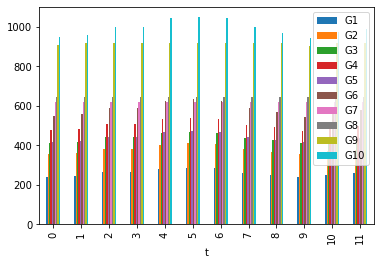

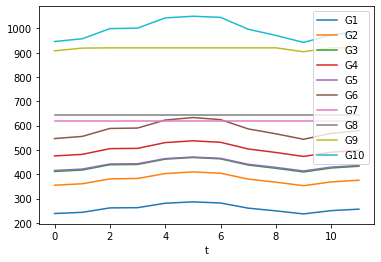

In [ ]:
head = data.keys()
data.plot(x=head[0], y=head[2:-2], kind="bar")
plt.show()
data.plot(x=head[0], y=head[2:-2], kind="line")
plt.show()

In [ ]:
data.keys()

Index(['t', 'Pd', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
       'Gerado', 'Corte'],
      dtype='object')